In [0]:
#Notes: https://forums.fast.ai/t/deep-learning-lesson-1-notes/27748

# text starting with % are special directives to jupyter notebooks called magics
#if somebody changes the library code while we execute this code, it reloads it automatically using these 2 lines
%reload_ext autoreload
%autoreload 2
#plotting something in jupyter itself
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Pet dataset is going to ask us to distinguish between 37 different categories of dog breed and cat breed

In [0]:
''' 
fast.ai >> organization name
fastai >> library
It suports 4 applications computer vision, Natural language text, tabular data and collaborative filtering

'''
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

untar_data: 

The first thing we have to do is download and extract the data that we want. We're going to be using this function called untar_data which will download it automatically and untar it. AWS has been kind enough to give us lots of space and bandwidth for these datasets so they'll download super quickly for you.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

url is a string, fname is either path or a string and defaults to nothing (Union means "either"). dest is either a string or a path and defaults to nothing.
we don't have to pass in a file name fname or a destination dest, it'll figure them out for us from the URL.

For all the datasets , thay already have constants defined for all of them. So in this URLs (https://github.com/fastai/fastai/blob/master/fastai/datasets.py) class, we can see where it's going to grab it from.

untar_data will download that to some convenient path and untar it for us and it will then return the value of path.

In [0]:
#once downloaded, it won't download again even after multiple execution 
path= untar_data(URLs.PETS); #URLs is a class


In [7]:
os.getcwd()

'/content'

In [8]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [9]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_img= path/'images'
path_anno= path/'annotations'

In [11]:
fname= get_image_files(path_img)
fname[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_95.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_43.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_169.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_114.jpg')]

In [12]:
type(fname)

list

In [0]:
np.random.seed(2)

pat = r'/([^/]+)_\d+.jpg$'


In [0]:
data= ImageDataBunch.from_name_re(path_img, fname, pat, ds_tfms=get_transforms(), size=224)
                                  
data= data.normalize(imagenet_stats)
                  

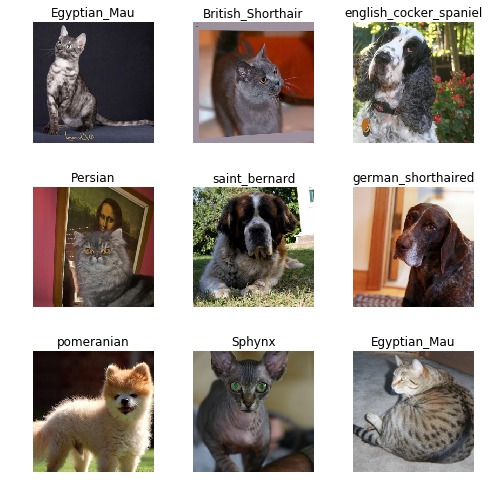

In [17]:
data.show_batch(rows=3, figsize=(7,7))

In [18]:
ImageDataBunch

fastai.vision.data.ImageDataBunch

In [19]:
type(data)

fastai.vision.data.ImageDataBunch

In [24]:
type(data.classes)

list

In [26]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [28]:
data.c;
len(data.classes)


37

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 81733560.98it/s]


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.444782,0.370757,0.117050,01:48
1,0.562173,0.247088,0.080514,01:47
2,0.351327,0.221071,0.078484,01:47
3,0.254636,0.220885,0.078484,01:54


In [0]:
learn.save('fastai_dog_breed_model-1')

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

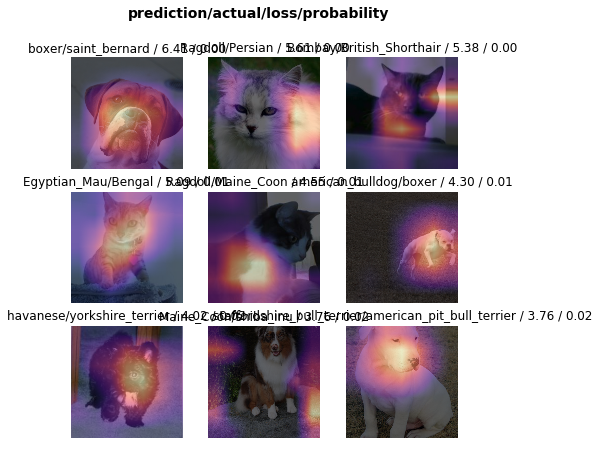

In [36]:
interp.plot_top_losses(9, figsize=(7,7))

In [37]:
doc(interp.plot_top_losses)

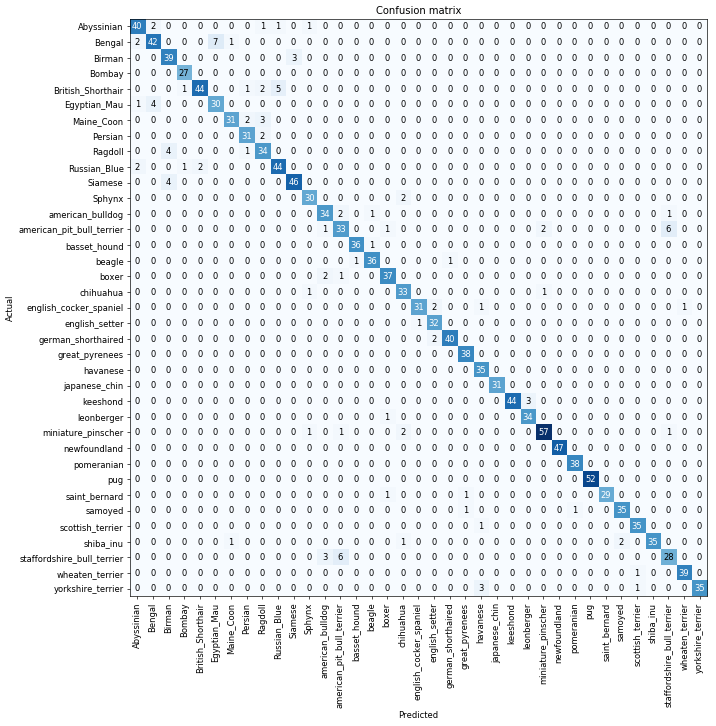

In [38]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [39]:
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('Siamese', 'Birman', 4),
 ('Birman', 'Siamese', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('keeshond', 'leonberger', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Abyssinian', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('german_shorthaired', 'english_setter', 2),
 ('miniature_pin

In [0]:
# Unfreezing, fine-tuning, and learning rates
learn.unfreeze()


In [41]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.452850,0.331361,0.107578,01:59


In [0]:
model.load()